In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz


# data split
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Scale 변환
from sklearn.preprocessing import StandardScaler
# 최적 모델 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


['NanumBarunpen',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumGothicCoding',
 'Nanum Brush Script',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumSquare',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumGothic Eco',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumGothicCoding',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'Nanum Pen Script',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic Eco',
 'Nanum Brush Script',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumGothic Eco',
 'Na

In [10]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

In [11]:
# !conda install graphviz

# Concrete의 강도를 예측하는 model을 생성  
# predict model을 이용하여 예측

In [12]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/Concrete.csv', encoding = 'euc-kr')

In [13]:
df_y = df["strength"]
df_x = df.drop(["strength"], axis = 1, inplace = False)

In [14]:
# data split
random_state = 100
test_size = 0.3
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = test_size, random_state = random_state)

* 변수 : 9개, 자료 1030개  
* 목표변수 : strength(강도)

# 실습 과제 1 : Decision Tree



|구분|Score_train|Score_test|Parameter 조정 값|
|:------|---|---|:---:|
|basic DT|99.9%|85.07%|-|
|Leaf 최소 node 조정|82.46%|78.29%|17|
|Split node 조정|82.46%|78.29%|36|
|Max Depth 조정|88.79%|80.46%|8|
|Random Seed|100|||

## 결론 : Decision Tree의 Test Data 예측값

In [106]:
tree_final = DecisionTreeRegressor(min_samples_leaf=17, min_samples_split=36, max_depth=8, random_state=100)
tree_final.fit(df_train_x, df_train_y)
predict_y = tree_final.predict(df_test_x)

acc = tree_final.score(df_test_x, df_test_y)
print("정확도(예측도) : {0:.2f}%".format(acc*100))

정확도(예측도) : 78.30%


In [15]:
# 기본 Decision Tree
tree_normal = DecisionTreeRegressor(random_state = random_state)
tree_normal.fit(df_train_x, df_train_y)
print("Score_train : {0}".format(tree_normal.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_normal.score(df_test_x, df_test_y)))

Score_train : 0.999009298261499
Score_test : 0.8507356257056871


## model의 parameter 조정

### min samples leaf

In [16]:
# min sample leaf : 잎사귀 노드의 최소 자료 수 설정
train_score = []
test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree_min_sample_leaf = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = v_min_samples_leaf)
    tree_min_sample_leaf.fit(df_train_x, df_train_y)
    train_score.append(tree_min_sample_leaf.score(df_train_x, df_train_y))
    test_score.append(tree_min_sample_leaf.score(df_test_x, df_test_y))

# 결과 저장
df_score_min_sample_leaf = pd.DataFrame()
df_score_min_sample_leaf["MinSampleLeaf"] = para_leaf
df_score_min_sample_leaf["TrainScore"] = train_score
df_score_min_sample_leaf["TestScore"] = test_score
df_score_min_sample_leaf["DIF"] = df_score_min_sample_leaf["TrainScore"] - df_score_min_sample_leaf["TestScore"]

In [17]:
# 설명력 확인
df_score_min_sample_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore,DIF
0,1,0.999,0.851,0.148
1,2,0.981,0.828,0.154
2,3,0.965,0.829,0.136
3,4,0.953,0.825,0.129
4,5,0.940,0.826,0.114
5,6,0.921,0.817,0.103
6,7,0.906,0.819,0.087
7,8,0.899,0.813,0.086
8,9,0.885,0.814,0.071
9,10,0.876,0.802,0.074


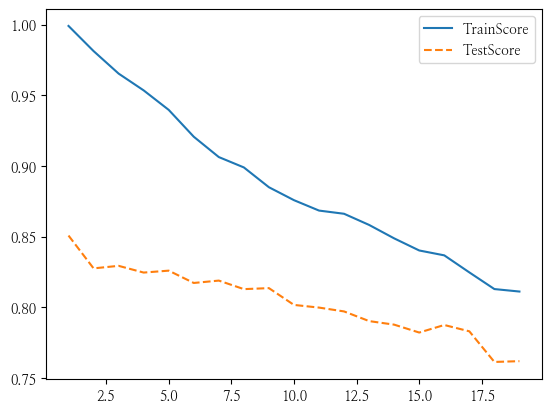

In [18]:
# 그래프
plt.plot(para_leaf, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_leaf, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [19]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

In [20]:
# node 최소 자료 수 : 2
min_node = 2
tree_min_sample_leaf = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node)
tree_min_sample_leaf.fit(df_train_x, df_train_y)

DecisionTreeRegressor(min_samples_leaf=2, random_state=100)

In [21]:
print("Score_train : {0}".format(tree_min_sample_leaf.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_min_sample_leaf.score(df_test_x, df_test_y)))

Score_train : 0.9812373804860695
Score_test : 0.8275230307678864


In [22]:
# node 최소 자료 수 : 17
min_node = 17
tree_min_sample_leaf = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node)
tree_min_sample_leaf.fit(df_train_x, df_train_y)
export_graphviz(tree_min_sample_leaf, out_file="tree_min_sample_leaf.dot", feature_names = v_feature_name, impurity = True, filled = True)

In [23]:
print("Score_train : {0}".format(tree_min_sample_leaf.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_min_sample_leaf.score(df_test_x, df_test_y)))

Score_train : 0.8246794137086233
Score_test : 0.7829985803333223


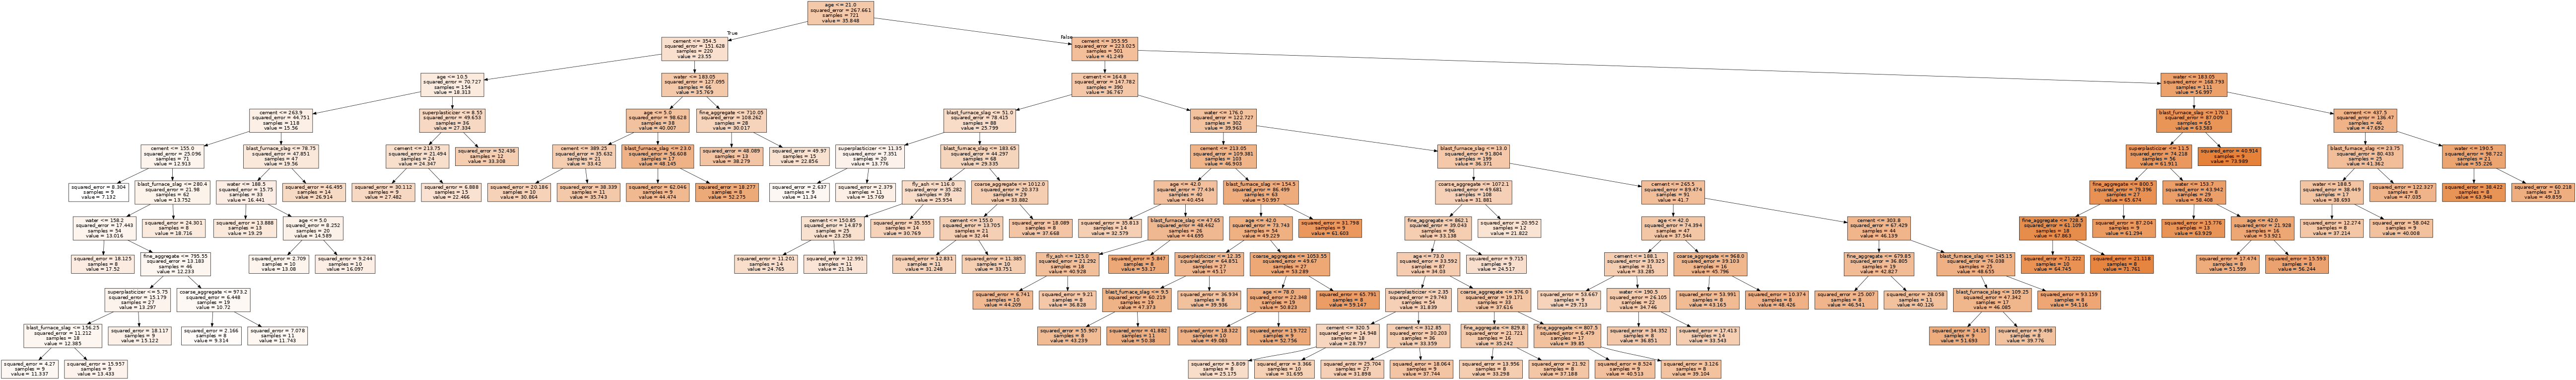

In [24]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_leaf.dot', '-o', 'tree.png', '-Gdpi=50'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

* node의 최소 자료 수 : 17
> 이유? 최소 자료 수를 1로 설정할 경우, Decision Tree의 성능은 뛰어날 수 있지만,  
> Decision Tree의 depth가 증가하여 overfitting 될 수 있기 때문이다.  
> 또한 Train Score와 Test Score의 차이가 가장 작아 실제 성능의 안정성이 높을 수 있도록   
> Leaf node의 최소 자료 수를 17로 설정하였다.

### min samples split

In [101]:
# min sample split : 분리 노드의 최소 자료 수 변경
train_score = []
test_score = []
min_node = 17
para_split  = [n_leaf * 2 for n_leaf in range(15,26)]

for v_min_samples_split in para_split:
    tree_min_sample_split = DecisionTreeRegressor(random_state = random_state, 
                                                  min_samples_leaf = min_node, min_samples_split = v_min_samples_split)
    tree_min_sample_split.fit(df_train_x, df_train_y)
    train_score.append(tree_min_sample_split.score(df_train_x, df_train_y))
    test_score.append(tree_min_sample_split.score(df_test_x, df_test_y))

# 결과 저장
df_score_min_sample_split = pd.DataFrame()
df_score_min_sample_split ["MinSampleLeaf"] = para_split
df_score_min_sample_split ["TrainScore"] = train_score
df_score_min_sample_split ["TestScore"] = test_score

In [27]:
# 설명력 확인
df_score_min_sample_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,30,0.825,0.783
1,32,0.825,0.783
2,34,0.825,0.783
3,36,0.825,0.783
4,38,0.822,0.780
5,40,0.808,0.774
6,42,0.802,0.768
7,44,0.802,0.768
8,46,0.800,0.766
9,48,0.777,0.753


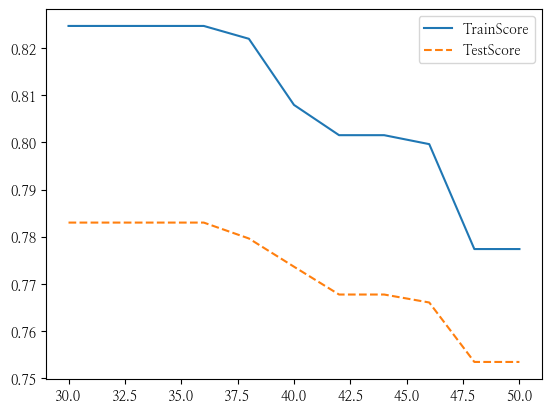

In [28]:
# 그래프
plt.plot(para_split, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_split, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [29]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

In [102]:
# split node min : 36
split_node = 36
tree_min_sample_split = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node
                                              , min_samples_split = split_node)
tree_min_sample_split.fit(df_train_x, df_train_y)
export_graphviz(tree_min_sample_split, out_file="tree_min_sample_split", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [31]:
print("Score_train : {0}".format(tree_min_sample_split.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_min_sample_split.score(df_test_x, df_test_y)))

Score_train : 0.8246794137086233
Score_test : 0.7829985803333223


In [32]:
# split node min : 46
split_node = 46
tree_min_sample_split = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node
                                              , min_samples_split = split_node)
tree_min_sample_split.fit(df_train_x, df_train_y)
export_graphviz(tree_min_sample_split, out_file="tree_min_sample_split", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [33]:
print("Score_train : {0}".format(tree_min_sample_split.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_min_sample_split.score(df_test_x, df_test_y)))

Score_train : 0.79962685207833
Score_test : 0.7660630567146879


* 분리 노드의 최소 자료 수 : 36
> 이유? 분리 노드의 최소 자료 수가 36까지는 감소하지 않았고,  
> 그 이후로 급격히 감소했기 때문이다.

### max depth 조정

In [103]:
# max depth : 최대 깊이 설정
split_node = 36
train_score = []
test_score = []
para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    tree_max_depth = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node, 
                                           min_samples_split = split_node, max_depth = v_max_depth)
    tree_max_depth.fit(df_train_x, df_train_y)
    train_score.append(tree_max_depth.score(df_train_x, df_train_y))
    test_score.append(tree_max_depth.score(df_test_x, df_test_y))

# 결과 저장
df_score_max_depth = pd.DataFrame()
df_score_max_depth["MinSampleLeaf"] = para_depth
df_score_max_depth["TrainScore"] = train_score
df_score_max_depth["TestScore"] = test_score

In [36]:
# 설명력 확인
df_score_max_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.248,0.248
1,2,0.504,0.442
2,3,0.639,0.595
3,4,0.733,0.678
4,5,0.784,0.739
5,6,0.811,0.775
6,7,0.821,0.780
7,8,0.825,0.783
8,9,0.825,0.783
9,10,0.825,0.783


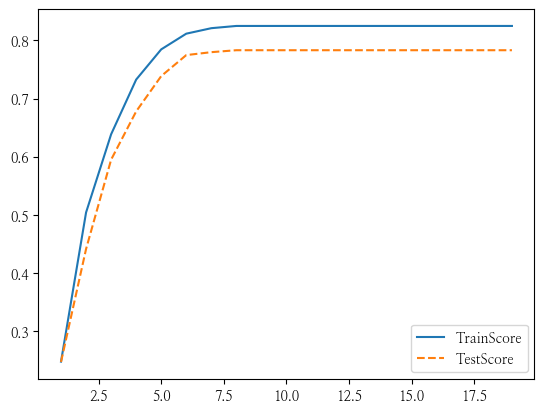

In [37]:
# 그래프
plt.plot(para_depth, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_depth, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [38]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

In [112]:
# max depth : 8
max_depth = 8
tree_max_depth = DecisionTreeRegressor(random_state = random_state, min_samples_leaf = min_node, 
                                       min_samples_split=split_node, max_depth = max_depth)
tree_max_depth.fit(df_train_x, df_train_y)
export_graphviz(tree_max_depth, out_file="tree_max_depth", feature_names = v_feature_name, impurity = True, filled = True)

# with open("tree_leaf.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [113]:
print("Score_train : {0}".format(tree_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_max_depth.score(df_test_x, df_test_y)))

Score_train : 0.8246794137086233
Score_test : 0.7829985803333223


* 트리 구조의 최대 깊이 : 8
> 이유? 최대 깊이가 증가할 수록 모델의 성능이 향상 했고,  
> 8이상일 때는 증가하지 않았기 때문이다.

In [41]:
max_depth = 8

## 최종 모델 선정

In [107]:
tree_final = DecisionTreeRegressor(random_state = 100, min_samples_leaf = 17, 
                                   min_samples_split= 36, max_depth = 8)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=17, min_samples_split=36,
                      random_state=100)

In [108]:
print("Score_train : {0}".format(tree_final.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_final.score(df_test_x, df_test_y)))

Score_train : 0.8246794137086233
Score_test : 0.7829985803333223


In [44]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

In [45]:
# 모델의 시각화
export_graphviz(tree_final, out_file="tree_final.dot", feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()

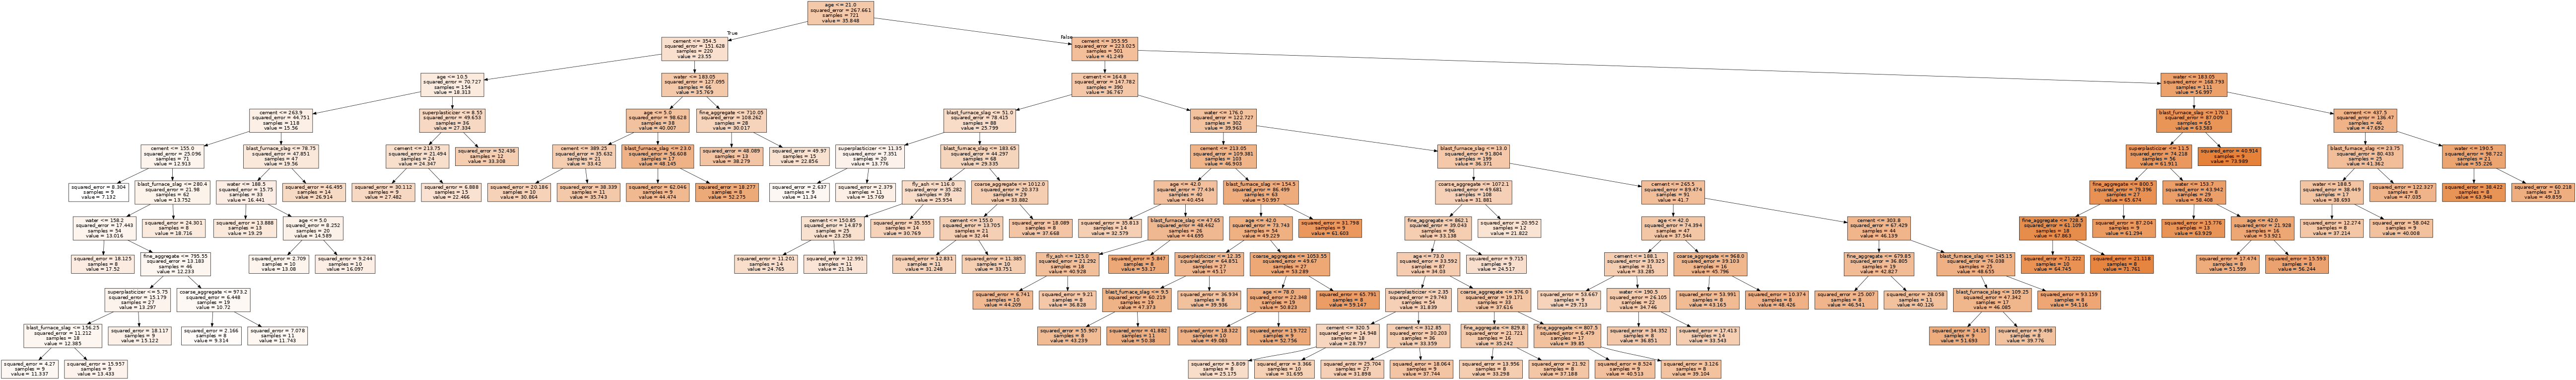

In [46]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_leaf.dot', '-o', 'tree.png', '-Gdpi=50'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

* 시각화 결과 해석
> Tree split에 영향이 큰 변수는 AGE(콘크리트의 수명)이며, 그 다음으로 CEMENT와 WATER가 있다.  
> 최대 깊이가 증가하면서 생성되는 Leaf의 자료 수는 감소하고 모델의 MSE 또한 지속적으로 감소하지만  
> 분리 조건에 따라 STENGTH는 상위 노드 대비 증가하거나 감소할 수도 있다.

In [47]:
# Feature Importance
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

In [48]:
# Importance 별로 정렬
df_importance.sort_values('importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,importance
0,cement,0.451
7,age,0.345
3,water,0.110
1,blast_furnace_slag,0.066
2,fly_ash,0.013
5,coarse_aggregate,0.008
4,superplasticizer,0.003
6,fine_aggregate,0.003


Text(0, 0.5, '변수')

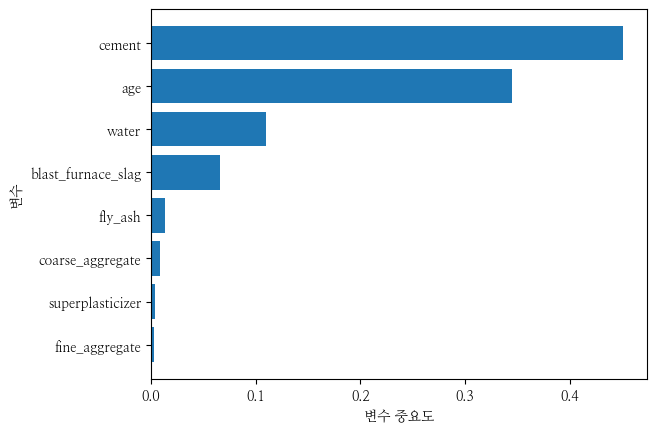

In [49]:
# 그래프 도식화
df_importance.sort_values('importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

* 결론 도출
> 중요 설명변수 : CEMNET, AGE, WATER 등
> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있다.

## GridSearchCV를 이용한 최적 Parameter 찾기

In [50]:
# estimator = DecisionTreeRegressor()
# # parameter와 범위
# param_grid = {"criterion" : ["squared_error", "friedman_mse", "absolute_error"], "max_features" : ['auto', 'sqrt', 'log2'], 
#               'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}
# # 최적 parameter 찾기
# grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
# grid_dt.fit(df_train_x, df_train_y)

# # print
# print("best estimator model : \n{0}".format(grid_dt.best_estimator_))
# print("\nbest parameter: \n{0}".format(grid_dt.best_params_))
# print("\nbest score: \n{0}".format(grid_dt.best_score_.round(3)))

* GridSearchCV는 fit을 이용하여 data를 적합시킬 때 train/validation data로 나누어 cross-validation을 적용하므로 앞선 결과와 다를 수 있음

# 실습과제 2 : Random Forest Model

|구분|Score_train|Score_test|Parameter 조정 값|
|:------|---|---|:---:|
|basic RF|99.9%|85.07%|-|
|Tree의 수|98.57%|89.68%|40|
|Leaf 최소 node 조정|87.80%|81.35%|11|
|Split node 조정|87.80%|81.35%|20|
|Max Depth 조정|87.75%|81.29%|8|
|Random Seed|100|||

## 결론 : Random Forest의 Test Data 예측값

In [100]:
rf_final = RandomForestRegressor(n_estimators = 40, min_samples_leaf=11, min_samples_split=20, max_depth=8, random_state=100)
rf_final.fit(df_train_x, df_train_y)
predict_y = rf_final.predict(df_test_x)

acc = rf_final.score(df_test_x, df_test_y)
print("정확도(예측도) : {0:.2f}%".format(acc*100))

정확도(예측도) : 81.29%


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/Concrete.csv', encoding = 'euc-kr')

In [53]:
df_y = df["strength"]
df_x = df.drop(["strength"], axis = 1, inplace = False)

In [54]:
# data split
random_state = 100
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = random_state)

## 기본 옵션

In [55]:
# 기본 Random Forest
rf_normal = RandomForestRegressor(random_state = random_state)
rf_normal.fit(df_train_x, df_train_y)
print("Score_train : {0}".format(tree_normal.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(tree_normal.score(df_test_x, df_test_y)))

Score_train : 0.999009298261499
Score_test : 0.8507356257056871


## Model Parameter 조정

### Tree 수의 변경

In [56]:
# min sample leaf : 잎사귀 노드의 최소 자료 수 설정
train_score = []
test_score = []
para_n_tree = [n_leaf * 10 for n_leaf in range(1,11)]

for v_n_estimators in para_n_tree:
    rf_n_tree = RandomForestRegressor(random_state = random_state, 
                                      n_estimators = v_n_estimators)
    rf_n_tree.fit(df_train_x, df_train_y)
    train_score.append(rf_n_tree.score(df_train_x, df_train_y))
    test_score.append(rf_n_tree.score(df_test_x, df_test_y))

# 결과 저장
rf_score_rf_n_tree = pd.DataFrame()
rf_score_rf_n_tree["n_estimators"] = para_n_tree
rf_score_rf_n_tree["TrainScore"] = train_score
rf_score_rf_n_tree["TestScore"] = test_score
rf_score_rf_n_tree["DIF"] = df_score_rf_n_tree["TrainScore"] - df_score_rf_n_tree["TestScore"] 

NameError: name 'df_score_rf_n_tree' is not defined

In [ ]:
# 설명력 확인
df_score_rf_n_tree.round(3)

In [ ]:
# 그래프
plt.plot(para_n_tree, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "TestScore")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

* 트리 개수의 최대 깊이 : 40  
> 이유? 트리 개수 40의 Test Score가 가장 높고,  
> Train과 Test의 차이가 가장 작기 때문이다.

In [ ]:
# tree 수 : 40
n_tree = 40
rf_min_sample_leaf = RandomForestRegressor(random_state = random_state, n_estimators = n_tree)
rf_min_sample_leaf.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_min_sample_leaf.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_min_sample_leaf.score(df_test_x, df_test_y)))

### min_samples_leaf

In [ ]:
# min sample leaf : 잎사귀 노드의 최소 자료 수 설정
train_score = []
test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,31)]

for v_min_samples_leaf in para_leaf:
    rf_min_sample_leaf = RandomForestRegressor(random_state = random_state, 
                                               min_samples_leaf = v_min_samples_leaf, n_estimators = n_tree)
    rf_min_sample_leaf.fit(df_train_x, df_train_y)
    train_score.append(rf_min_sample_leaf.score(df_train_x, df_train_y))
    test_score.append(rf_min_sample_leaf.score(df_test_x, df_test_y))

# 결과 저장
rf_score_min_sample_leaf = pd.DataFrame()
rf_score_min_sample_leaf["MinSampleLeaf"] = para_leaf
rf_score_min_sample_leaf["TrainScore"] = train_score
rf_score_min_sample_leaf["TestScore"] = test_score
rf_score_min_sample_leaf["DIF"] = df_score_min_sample_leaf["TrainScore"] - df_score_min_sample_leaf["TestScore"]

In [ ]:
# 설명력 확인
rf_score_min_sample_leaf.round(3)

In [ ]:
# 그래프
plt.plot(para_leaf, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_leaf, test_score, linestyle = "--", label = "TestScore")
plt.legend()

* node의 최소 자료 수 : 11
> 이유? 최소 자료 수를 1로 설정할 경우, Decision Tree의 성능은 뛰어날 수 있지만,  
> Decision Tree의 depth가 증가하여 overfitting 될 수 있기 때문이다.  
> Leaf의 수가 증가할수록 model의 성능은 지속적으로 감소하기 때문에  
> Train Score가 80 이상일 때를 기준으로 삼았다.

In [ ]:
# node 최소 자료 수 : 11
min_node = 11
rf_min_sample_leaf = RandomForestRegressor(random_state = random_state, 
                                           min_samples_leaf = min_node, n_estimators = n_tree)
rf_min_sample_leaf.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_min_sample_leaf.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_min_sample_leaf.score(df_test_x, df_test_y)))

### min samples split

In [ ]:
# min sample split : 분리 노드의 최소 자료 수 변경
train_score = []
test_score = []
para_split  = [n_leaf * 2 for n_leaf in range(6,21)]

for v_min_samples_split in para_split:
    rf_min_sample_split = RandomForestRegressor(random_state = random_state, n_estimators = n_tree,
                                                  min_samples_leaf = min_node, min_samples_split = v_min_samples_split)
    rf_min_sample_split.fit(df_train_x, df_train_y)
    train_score.append(rf_min_sample_split.score(df_train_x, df_train_y))
    test_score.append(rf_min_sample_split.score(df_test_x, df_test_y))

# 결과 저장
rf_score_min_sample_split = pd.DataFrame()
rf_score_min_sample_split ["MinSampleSplit"] = para_split
rf_score_min_sample_split ["TrainScore"] = train_score
rf_score_min_sample_split ["TestScore"] = test_score

In [ ]:
# 설명력 확인
rf_score_min_sample_split.round(3)

In [ ]:
# 그래프
plt.plot(para_split, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_split, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
# split node min : 22
split_node = 22
rf_min_sample_split = RandomForestRegressor(random_state = random_state, n_estimators = n_tree,
                                                  min_samples_leaf = min_node, min_samples_split = split_node)
rf_min_sample_split.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_min_sample_split.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_min_sample_split.score(df_test_x, df_test_y)))

In [ ]:
# split node min : 20
split_node = 20
rf_min_sample_split = RandomForestRegressor(random_state = random_state, n_estimators = n_tree,
                                                  min_samples_leaf = min_node, min_samples_split = split_node)
rf_min_sample_split.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_min_sample_split.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_min_sample_split.score(df_test_x, df_test_y)))

* 분리 노드의 최소 자료 수 : 20
> 이유? 분리 노드의 최소 자료 수가 20까지는 감소하지 않았고,  
> 그 이후로 급격히 감소했기 때문이다.

### max depth 조정

In [ ]:
# max depth : 최대 깊이 설정
train_score = []
test_score = []
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    rf_max_depth = RandomForestRegressor(random_state = random_state, n_estimators = n_tree, 
                                         min_samples_leaf = min_node, min_samples_split = split_node, max_depth = v_max_depth)
    rf_max_depth.fit(df_train_x, df_train_y)
    train_score.append(rf_max_depth.score(df_train_x, df_train_y))
    test_score.append(rf_max_depth.score(df_test_x, df_test_y))

# 결과 저장
rf_score_max_depth = pd.DataFrame()
rf_score_max_depth["MaxDepth"] = para_depth
rf_score_max_depth["TrainScore"] = train_score
rf_score_max_depth["TestScore"] = test_score

In [ ]:
# 설명력 확인
rf_score_max_depth.round(3)

In [ ]:
# 그래프
plt.plot(para_depth, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_depth, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
# max depth : 8
max_depth = 8
rf_max_depth = RandomForestRegressor(random_state = random_state, n_estimators = n_tree, 
                                         min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
rf_max_depth.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_max_depth.score(df_test_x, df_test_y)))

* 트리 구조의 최대 깊이 : 8
> 이유? 최대 깊이가 증가할 수록 모델의 성능이 향상 했고,  
> 8이상일 때는 증가하지 않았기 때문이다.

## 최종 모델 선정

In [ ]:
rf_final = RandomForestRegressor(random_state = random_state, n_estimators = n_tree, 
                                 min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
rf_final.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(rf_final.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(rf_final.score(df_test_x, df_test_y)))

## 최종 모델 시각화

In [ ]:
# 나무구조 시각화(Graphviz)
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rf_final_0.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)

In [ ]:
# 0번 Tree
with open("rf_final_0.dot") as f:
    dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_leaf.dot', '-o', 'tree.png', '-Gdpi=50'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
# 9번 Tree
export_graphviz(rf_final.estimators_[9], out_file="rf_final_29.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_29.dot") as f:
    dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [ ]:
# 19번 Tree
export_graphviz(rf_final.estimators_[19], out_file="rf_final_39.dot", 
                feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_39.dot") as f:
    dot_graph = f.read()
# display(graphviz.Source(dot_graph))

## Feature Importance

In [ ]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

In [ ]:
# Importance 별로 정렬
df_importance.sort_values('importance', ascending = False, inplace = True)
df_importance.round(3)

In [ ]:
# 그래프 도식화
df_importance.sort_values('importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

* 결론 도출
> 중요 설명변수 : CEMNET, AGE, WATER 등
> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있다.

## GridSearchCV

In [ ]:
# estimator = RandomForestRegressor(random_state = random_state)
# # parameter와 범위
# param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}
# # 최적 parameter 찾기
# grid_rt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
# grid_rt.fit(df_train_x, df_train_y)

# # print
# print("best estimator model : \n{0}".format(grid_rt.best_estimator_))
# print("\nbest parameter: \n{0}".format(grid_rt.best_params_))
# print("\nbest score: \n{0}".format(grid_rt.best_score_.round(3)))

# 실습과제 3 : Gradient Boost

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

|구분|Score_train|Score_test|Parameter 조정 값|
|:------|---|---|:---:|
|basic RF|95.38%|90.81%|-|
|Tree의 수|94.52%|90.07%|80|
|Leaf 최소 node 조정|93.72%|89.54%|12|
|Split node 조정|93.75%|89.57%|34|
|Max Depth 조정|98.58%|91.95%|7|
|Learning Rate|99.63%|92.23%|0.4|
|Random Seed|100|||

## 결론 : Gradient Boosting의 Test Data 예측값

In [115]:
gb_final = GradientBoostingRegressor(n_estimators = 80, learning_rate = 0.4, 
                                     min_samples_leaf=12, min_samples_split=34, max_depth=7, random_state=100)
gb_final.fit(df_train_x, df_train_y)
predict_y = gb_final.predict(df_test_x)
tree_final.score(df_test_x, df_test_y)

acc = gb_final.score(df_test_x, df_test_y)
print("정확도(예측도) : {0:.2f}%".format(acc*100))

정확도(예측도) : 92.23%


In [ ]:
# 기본 Gradient Boost
gb_normal = GradientBoostingRegressor(random_state = random_state)
gb_normal.fit(df_train_x, df_train_y)
print("Score_train : {0}".format(gb_normal.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_normal.score(df_test_x, df_test_y)))

## model 의 parameter 조정

### n_estimators

In [ ]:
# n_estimators
train_score = []
test_score = []
para_n_tree = [n_leaf * 10 for n_leaf in range(1,20)]

for v_n_estimators in para_n_tree:
    gb_n_tree = GradientBoostingRegressor(random_state = random_state, 
                                      n_estimators = v_n_estimators)
    gb_n_tree.fit(df_train_x, df_train_y)
    train_score.append(gb_n_tree.score(df_train_x, df_train_y))
    test_score.append(gb_n_tree.score(df_test_x, df_test_y))

# 결과 저장
gb_score_rf_n_tree = pd.DataFrame()
gb_score_rf_n_tree["n_estimators"] = para_n_tree
gb_score_rf_n_tree["TrainScore"] = train_score
gb_score_rf_n_tree["TestScore"] = test_score
gb_score_rf_n_tree["DIF"] = gb_score_rf_n_tree["TrainScore"] - gb_score_rf_n_tree["TestScore"]

In [ ]:
# 설명력 확인
gb_score_rf_n_tree.round(3)

In [ ]:
# 그래프
plt.plot(para_n_tree, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "TestScore")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [ ]:
n_tree = 80
# tree의 수 : 80
gb_n_tree = GradientBoostingRegressor(random_state = random_state, 
                                      n_estimators = n_tree)
gb_n_tree.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_n_tree.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_n_tree.score(df_test_x, df_test_y)))

* Tree의 수 : 80  
> 이유? Tree 수가 증가할 수록 모델의 성능은 좋아진다.  
> n이 80이상부터는 성능의 증가 추이가 미미하여  
> tree의 수를 80으로 선정하였다.

### min samples leaf

In [ ]:
# min sample leaf : 잎사귀 노드의 최소 자료 수 설정
train_score = []
test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb_min_sample_leaf = GradientBoostingRegressor(random_state = random_state, 
                                                   min_samples_leaf = v_min_samples_leaf, n_estimators = n_tree)
    gb_min_sample_leaf.fit(df_train_x, df_train_y)
    train_score.append(gb_min_sample_leaf.score(df_train_x, df_train_y))
    test_score.append(gb_min_sample_leaf.score(df_test_x, df_test_y))

# 결과 저장
gb_score_min_sample_leaf = pd.DataFrame()
gb_score_min_sample_leaf["MinSampleLeaf"] = para_leaf
gb_score_min_sample_leaf["TrainScore"] = train_score
gb_score_min_sample_leaf["TestScore"] = test_score

In [ ]:
# 설명력 확인
gb_score_min_sample_leaf.round(3)

In [ ]:
# 그래프
plt.plot(para_leaf, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_leaf, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
min_node = 12
# node 최소 자료 수 : 12 
gb_min_sample_leaf = GradientBoostingRegressor(random_state = random_state, min_samples_leaf = min_node, 
                                               n_estimators = n_tree)
gb_min_sample_leaf.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_min_sample_leaf.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_min_sample_leaf.score(df_test_x, df_test_y)))

* Leaf 수 : 12
> 이유? 12일때 Test Score의 성능이 가장 뛰어 나기 때문이다.

### min samples split

In [ ]:
# min sample split : 분리 노드의 최소 자료 수 변경
train_score = []
test_score = []
para_split  = [n_leaf * 2 for n_leaf in range(6,21)]

for v_min_samples_split in para_split:
    gb_min_sample_split = GradientBoostingRegressor(random_state = random_state, n_estimators = n_tree,
                                                  min_samples_leaf = min_node, min_samples_split = v_min_samples_split)
    gb_min_sample_split.fit(df_train_x, df_train_y)
    train_score.append(gb_min_sample_split.score(df_train_x, df_train_y))
    test_score.append(gb_min_sample_split.score(df_test_x, df_test_y))

# 결과 저장
gb_score_min_sample_split = pd.DataFrame()
gb_score_min_sample_split ["MinSampleSplit"] = para_split
gb_score_min_sample_split ["TrainScore"] = train_score
gb_score_min_sample_split ["TestScore"] = test_score
gb_score_min_sample_split["differance"] = gb_score_min_sample_split ["TrainScore"] - gb_score_min_sample_split ["TestScore"]

In [ ]:
# 설명력 확인
gb_score_min_sample_split.round(3)

In [ ]:
# 그래프
plt.plot(para_split, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_split, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
split_node = 34
# split node min : 34
gb_min_sample_split = GradientBoostingRegressor(random_state = random_state, n_estimators = n_tree,
                                                  min_samples_leaf = min_node, min_samples_split = split_node)
gb_min_sample_split.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_min_sample_split.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_min_sample_split.score(df_test_x, df_test_y)))

* Split node의 수 : 34  
> Split node의 수가 34일때, Test Score의 성능이 뛰어 났고,  
> Train과 Test의 차이가 가장 작아, 실제 상황에서 안정성이  
> 가장 뛰어 날 것으로 판단하였다.

### max depth 조정

In [ ]:
# max depth : 최대 깊이 설정
train_score = []
test_score = []
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    gb_max_depth = GradientBoostingRegressor(random_state = random_state, 
                                             n_estimators = n_tree, min_samples_leaf = min_node, min_samples_split = split_node, max_depth = v_max_depth)
    gb_max_depth.fit(df_train_x, df_train_y)
    train_score.append(gb_max_depth.score(df_train_x, df_train_y))
    test_score.append(gb_max_depth.score(df_test_x, df_test_y))

# 결과 저장
gb_score_max_depth = pd.DataFrame()
gb_score_max_depth["MaxDepth"] = para_depth
gb_score_max_depth["TrainScore"] = train_score
gb_score_max_depth["TestScore"] = test_score
gb_score_max_depth["differance"] = gb_score_max_depth["TrainScore"] - gb_score_max_depth["TestScore"]

In [ ]:
# 설명력 확인
gb_score_max_depth.round(3)

In [ ]:
# 그래프
plt.plot(para_depth, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_depth, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
max_depth = 7
# max depth : 7
gb_max_depth = GradientBoostingRegressor(random_state = random_state, n_estimators = n_tree, 
                                         min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
gb_max_depth.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_max_depth.score(df_test_x, df_test_y)))

In [ ]:
max_depth = 10
# max depth : 10
gb_max_depth = GradientBoostingRegressor(random_state = random_state, n_estimators = n_tree, 
                                         min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
gb_max_depth.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_max_depth.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_max_depth.score(df_test_x, df_test_y)))

* Depth : 7 
> 이유? 10일때가 모델의 성능이 가장 뛰어나지만  
> 7일때와 비교하여 성능의 급격한 차이가 없고,  
> 7일때가 Train과 Test의 차이가 적어 안정성이  
> 뛰어날 것으로 판단하였다.

### Learning rate

In [ ]:
# 학습률 설정
train_score = []
test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb_lr = GradientBoostingRegressor(learning_rate = v_learning_rate, random_state = random_state, n_estimators = n_tree, 
                                         min_samples_leaf = min_node, min_samples_split = split_node, max_depth = v_max_depth)
    gb_lr.fit(df_train_x, df_train_y)
    train_score.append(gb_lr.score(df_train_x, df_train_y))
    test_score.append(gb_lr.score(df_test_x, df_test_y))

# 결과 저장
gb_score_lr = pd.DataFrame()
gb_score_lr["MaxDepth"] = para_lr
gb_score_lr["TrainScore"] = train_score
gb_score_lr["TestScore"] = test_score

In [ ]:
# 설명력 확인
gb_score_lr.round(3)

In [ ]:
# 그래프
plt.plot(para_lr, train_score, linestyle = "-", label = "TrainScore")
plt.plot(para_lr, test_score, linestyle = "--", label = "TestScore")
plt.legend()

In [ ]:
lr = 0.2
# lr : 0.2
gb_lr = GradientBoostingRegressor(learning_rate = lr, random_state = random_state, n_estimators = n_tree, min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
gb_lr.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_lr.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_lr.score(df_test_x, df_test_y)))

In [ ]:
lr = 0.4
# lr : 0.4
gb_lr = GradientBoostingRegressor(learning_rate = lr, random_state = random_state, n_estimators = n_tree, min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
gb_lr.fit(df_train_x, df_train_y)

In [ ]:
print("Score_train : {0}".format(gb_lr.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_lr.score(df_test_x, df_test_y)))

* Learning Rate : 0.4
> 이유? 0.4일때 성능이 가장 우수하였다.

## 최종 모델 선정

In [ ]:
gb_final = GradientBoostingRegressor(learning_rate = lr, random_state = random_state, n_estimators = n_tree, min_samples_leaf = min_node, min_samples_split = split_node, max_depth = max_depth)
gb_final.fit(df_train_x, df_train_y)

In [116]:
print("Score_train : {0}".format(gb_final.score(df_train_x, df_train_y)))
print("Score_test : {0}".format(gb_final.score(df_test_x, df_test_y)))

Score_train : 0.9938366095605167
Score_test : 0.9222591305044957


## Feature Importance

In [ ]:
v_feature_name = df_train_x.columns

In [ ]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = gb_final.feature_importances_

In [ ]:
# Importance 별로 정렬
df_importance.sort_values('importance', ascending = False, inplace = True)
df_importance.round(3)

In [ ]:
# 그래프 도식화
df_importance.sort_values('importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

* 결론 도출
> 중요 설명변수 : CEMNET, AGE, WATER 등
> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있다.

## GridSearchCV

In [ ]:
# estimator = GradientBoostingRegressor(random_state = random_state)
# # parameter와 범위
# param_grid = {"criterion" : ["squared_error", "friedman_mse", "absolute_error"], "max_features" : ['auto', 'sqrt', 'log2'], 
#               "learning_rate": para_lr, 'max_depth' : para_depth, 'min_samples_leaf' : para_leaf}
# # 최적 parameter 찾기
# grid_gb = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
# grid_gb.fit(df_train_x, df_train_y)

# # print
# print("best estimator model : \n{0}".format(grid_gb.best_estimator_))
# print("\nbest parameter: \n{0}".format(grid_gb.best_params_))
# print("\nbest score: \n{0}".format(grid_gb.best_score_.round(3)))